In [21]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt

In [48]:
data_path = os.getcwd() + "\Data\Transformed_Data\defenders_correlated.csv"

df = pd.read_csv(data_path)
df.head()

,Season,name,position,team,total_points,bps,clean_sheets,bonus,influence,ict_index,minutes,goals_scored,threat,assists,creativity,value,selected
0,2021-22,Alex Nicolao Telles,DEF,Man Utd,1,12,0,0,13.8,4.4,90,0,4.0,0,26.3,50,9011
1,2021-22,Takehiro Tomiyasu,DEF,Arsenal,1,11,0,0,13.2,3.2,90,0,0.0,0,18.4,46,329334
2,2021-22,Harry Maguire,DEF,Man Utd,1,14,0,0,24.0,3.4,90,0,8.0,0,1.8,54,401476
3,2021-22,Victor Lindelöf,DEF,Man Utd,1,16,0,0,18.0,3.6,90,0,17.0,0,1.0,48,41053
4,2021-22,José Diogo Dalot Teixeira,DEF,Man Utd,1,18,0,0,18.8,3.1,90,0,9.0,0,3.0,44,6419


<AxesSubplot:>

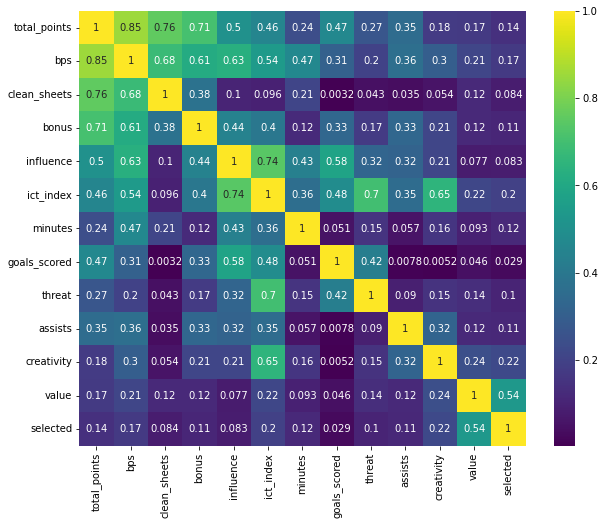

In [49]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14645 entries, 0 to 14644
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Season        14645 non-null  object 
 1   name          14645 non-null  object 
 2   position      14645 non-null  object 
 3   team          14645 non-null  object 
 4   total_points  14645 non-null  int64  
 5   bps           14645 non-null  int64  
 6   clean_sheets  14645 non-null  int64  
 7   bonus         14645 non-null  int64  
 8   influence     14645 non-null  float64
 9   ict_index     14645 non-null  float64
 10  minutes       14645 non-null  int64  
 11  goals_scored  14645 non-null  int64  
 12  threat        14645 non-null  float64
 13  assists       14645 non-null  int64  
 14  creativity    14645 non-null  float64
 15  value         14645 non-null  int64  
 16  selected      14645 non-null  int64  
dtypes: float64(4), int64(9), object(4)
memory usage: 1.9+ MB


In [51]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_points,14645.0,2.999659,3.066247,-7.0,1.0,2.0,6.0,24.0
bps,14645.0,15.971594,9.020532,-12.0,10.0,15.0,22.0,75.0
clean_sheets,14645.0,0.263981,0.440804,0.0,0.0,0.0,1.0,1.0
bonus,14645.0,0.229362,0.668515,0.0,0.0,0.0,0.0,3.0
influence,14645.0,18.312229,11.741273,0.0,10.8,16.8,23.6,93.4
ict_index,14645.0,3.304595,2.408558,0.0,1.7,2.7,4.3,22.8
minutes,14645.0,81.329191,22.173973,1.0,90.0,90.0,90.0,90.0
goals_scored,14645.0,0.039536,0.200060,0.0,0.0,0.0,0.0,2.0
threat,14645.0,6.855514,11.303093,0.0,0.0,2.0,8.0,152.0
assists,14645.0,0.060772,0.253885,0.0,0.0,0.0,0.0,3.0


Let's look at the distribution of total points.

C:\Users\GV147BE\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_points', ylabel='Density'>

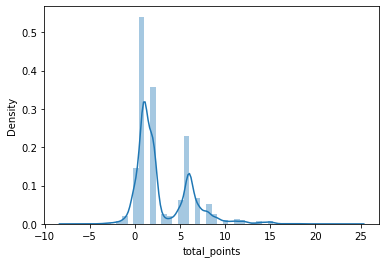

In [52]:
sns.distplot(df['total_points'])

We can see that there are a large amount of 0 total_points entries, we need to check if this is because they did not play any minutes.

In [53]:
print('Not Played: ', len(df[df['minutes']==0]))
print('Played: ', len(df[df['minutes']!=0]))
print('% Not Played: ', len(df[df['minutes']==0])/len(df)*100,'%')

Not Played:  0
Played:  14645
% Not Played:  0.0 %


We need to remove 50.1% of our data points... not good!

In [54]:
df = df[df['minutes']!=0]
df.head()

,Season,name,position,team,total_points,bps,clean_sheets,bonus,influence,ict_index,minutes,goals_scored,threat,assists,creativity,value,selected
0,2021-22,Alex Nicolao Telles,DEF,Man Utd,1,12,0,0,13.8,4.4,90,0,4.0,0,26.3,50,9011
1,2021-22,Takehiro Tomiyasu,DEF,Arsenal,1,11,0,0,13.2,3.2,90,0,0.0,0,18.4,46,329334
2,2021-22,Harry Maguire,DEF,Man Utd,1,14,0,0,24.0,3.4,90,0,8.0,0,1.8,54,401476
3,2021-22,Victor Lindelöf,DEF,Man Utd,1,16,0,0,18.0,3.6,90,0,17.0,0,1.0,48,41053
4,2021-22,José Diogo Dalot Teixeira,DEF,Man Utd,1,18,0,0,18.8,3.1,90,0,9.0,0,3.0,44,6419


C:\Users\GV147BE\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_points', ylabel='Density'>

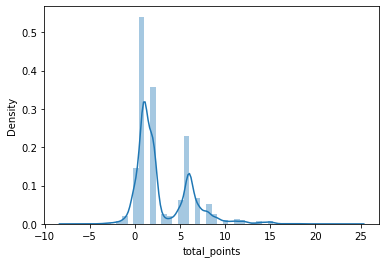

In [55]:
#let's look at our dist plot again
sns.distplot(df['total_points'])

In [56]:
df['total_points'].value_counts().sort_values()

 20       1
 19       1
 24       1
-7        1
-6        1
 16       4
 21       4
-4        5
 17       7
 18       8
 13      20
-3       27
 14      58
-2       62
 15      75
 10      93
 12     102
 11     105
 4      184
-1      199
 3      231
 9      235
 8      467
 5      576
 7      621
 0     1322
 6     2080
 2     3245
 1     4910
Name: total_points, dtype: int64

We can see that the most frequent score for a defender is 1 point.

Let's investigate the relationship between price and total points to see if you get bang for your buck with defenders.

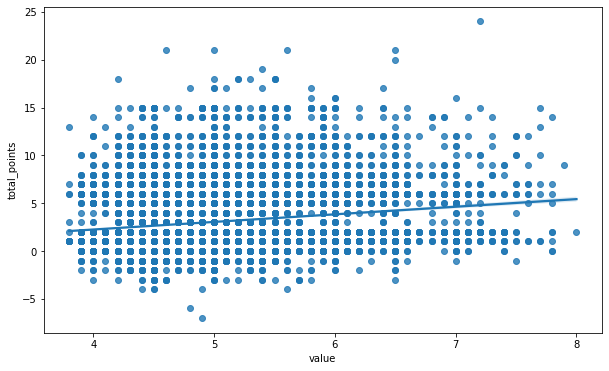

In [31]:
#scale the value column to reflect prices in the game
df['value'] = df['value'] / 10

plt.figure(figsize=(10,6))
sns.regplot(x='value',y='total_points',data=df)
plt.show()

As we can see there is very little correlation between value and total_points. 

To check this lets look at total_points per season for each team's defenders.

In [32]:
players = df[['name', 'Season', 'total_points', 'value']]
players.head()

,name,Season,total_points,value
0,Alex Nicolao Telles,2021-22,1,5.0
4,Takehiro Tomiyasu,2021-22,1,4.6
6,Harry Maguire,2021-22,1,5.4
14,Victor Lindelöf,2021-22,1,4.8
16,José Diogo Dalot Teixeira,2021-22,1,4.4


In [33]:
players = players.groupby(['name', 'Season']).agg({'total_points': 'sum', 'value': 'mean'})
players.reset_index(inplace=True)
players.sort_values(by='total_points')

,name,Season,total_points,value
431,Kayne Ramsay,2020-21,-3,4.000000
591,Neil Taylor,2020-21,-1,4.200000
238,Eric Bailly,2021-22,-1,4.900000
565,Michael Hector,2020-21,0,4.425000
30,Allan Tchaptchet,2020-21,0,4.000000
...,...,...,...,...
40,Andrew Robertson,2019-20,181,6.983333
750,Trent Alexander-Arnold,2018-19,185,5.262069
771,Virgil van Dijk,2018-19,208,6.281579
751,Trent Alexander-Arnold,2019-20,210,7.426316


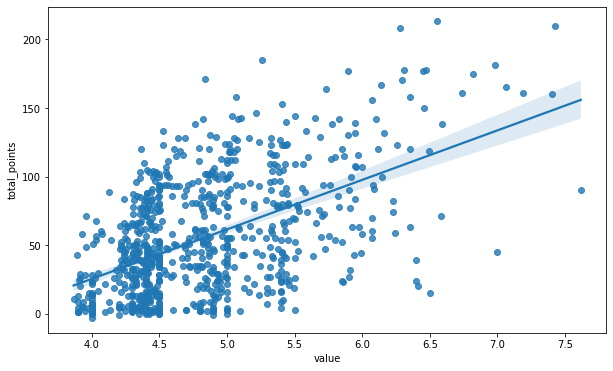

In [34]:
plt.figure(figsize=(10,6))
sns.regplot(x='value',y='total_points',data=players)
plt.show()

We can see that over the course of a season that there is an increase in total points with price. This indicates that is worth spending high on a few defenders if you can get it right!

Let's investigate if it matters which team you get your defenders from.

In [37]:
teams = df[['team', 'Season', 'total_points', 'value']]
teams.head()

,team,Season,total_points,value
0,Man Utd,2021-22,1,5.0
4,Arsenal,2021-22,1,4.6
6,Man Utd,2021-22,1,5.4
14,Man Utd,2021-22,1,4.8
16,Man Utd,2021-22,1,4.4


In [38]:
teams = teams.groupby(['team', 'Season']).agg({'total_points': 'sum', 'value': 'mean'})
teams.reset_index(inplace=True)
teams.sort_values(by='total_points')

,team,Season,total_points,value
81,Norwich,2017-18,5,4.200000
82,Norwich,2018-19,6,4.800000
88,Sheffield Utd,2018-19,22,4.328571
84,Norwich,2020-21,31,4.761538
110,West Brom,2018-19,43,3.890000
...,...,...,...,...
30,Chelsea,2020-21,718,5.223243
116,West Ham,2020-21,740,4.744907
58,Liverpool,2018-19,744,5.780851
64,Man City,2018-19,782,5.625373


C:\Users\GV147BE\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_points', ylabel='Density'>

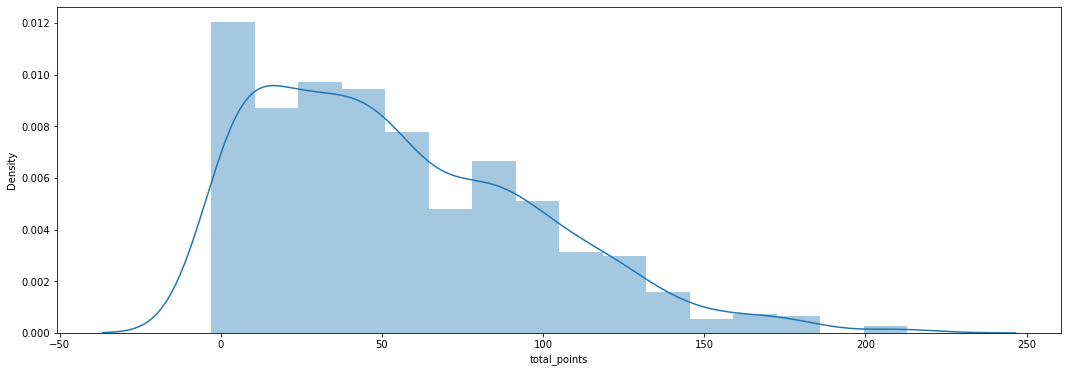

In [39]:
plt.figure(figsize=(18,6))
sns.distplot(players['total_points'])

It looks like that most teams defenders get a similar total over the course of a season, apart from a few. It could be worth considering backing historically good defences like Man City and Liverpool. 

Let's have a look at how stable the ict_index variable is, as when inputting to the model we will have to predict this by aggregating player past performance.

C:\Users\GV147BE\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ict_index', ylabel='Density'>

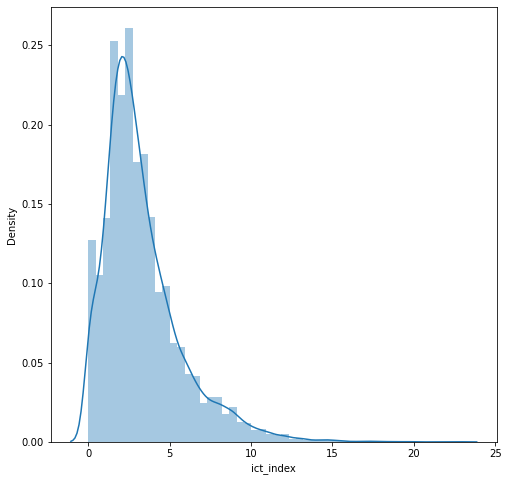

In [41]:
plt.figure(figsize=(8,8))
sns.distplot(df['ict_index'])

This variable has a normal distribution this could mean it has good discriminatory power so we will leave this variable in.

Let's have a look at selected vs total_points, i.e. are the general public good at choosing defenders?

<AxesSubplot:xlabel='total_points', ylabel='selected'>

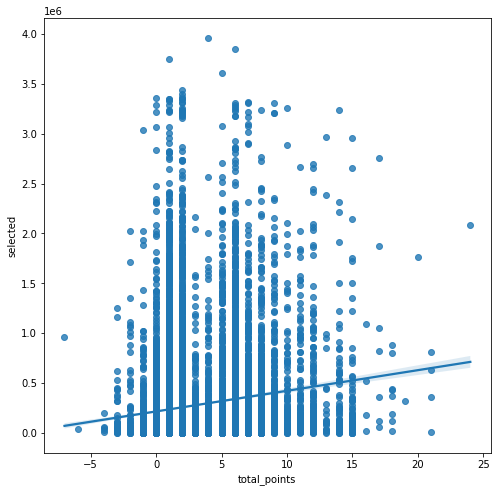

In [43]:
plt.figure(figsize=(8,8))
sns.regplot(x='total_points', y='selected', data=df)

There is a slight correlation but in general the public is not good at selecting defenders.

Finally let's look at saves vs bps

<AxesSubplot:xlabel='bps', ylabel='total_points'>

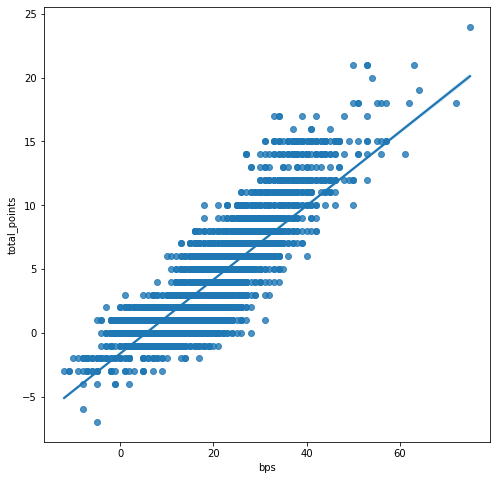

In [45]:
plt.figure(figsize=(8,8,))
sns.regplot(x='bps', y='total_points', data=df)

As expected this shows good correlation. This is interesting as it is such a powerful predictor but there are only 3 players per match that receive bonus points.

<h1>Let's save the datasets again based on what we found out</h1>

In [47]:
data_path = os.getcwd() + "\Data\Transformed_Data"

defenders_correlated = pd.read_csv(data_path + "\\defenders_correlated.csv")
defenders_correlated = defenders_correlated[defenders_correlated['minutes']!=0]
defenders_correlated.to_csv(data_path + "\\defenders_correlated.csv", index=False)

defenders = pd.read_csv(data_path + "\\defenders.csv")
defenders = defenders[defenders['minutes']!=0]
defenders.to_csv(data_path + "\\defenders.csv", index=False)

print(len(defenders_correlated))
print(len(defenders))

14645
14645
